In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.2.2
torchvision version: 0.17.2


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
# MacoOS device agnostic code:

if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available
    
device

'mps'

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data" # where to download data to?
    , train=True # get training data
    , download=True # download data if it doesn't exist on disk
    , transform=ToTensor() # images come as PIL format, we want to turn into Torch tensors
    , target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data"
    , train=False # get test data
    , download=True
    , transform=ToTensor()
)

100%|█████████████████████████| 26421880/26421880 [00:01<00:00, 14770032.08it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 197465.83it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|████████████████████████████| 4422102/4422102 [00:01<00:00, 4367163.44it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████████| 5148/5148 [00:00<00:00, 11754097.44it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [11]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [10]:
train_data.data.shape, train_data.targets.shape, test_data.data.shape, test_data.targets.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [12]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


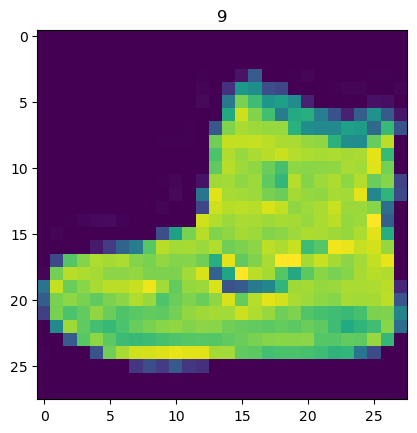

In [13]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

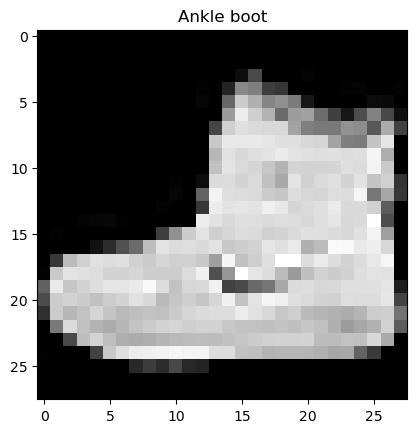

In [14]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

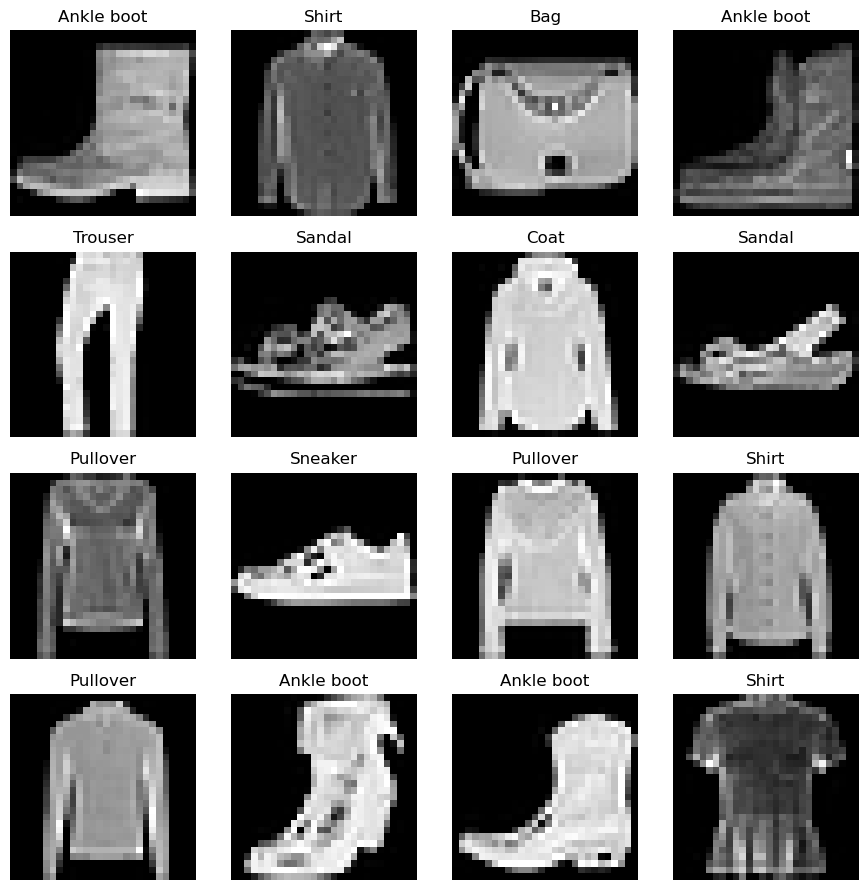

In [15]:
torch.manual_seed(42)  # prevents printing the Generator
rows, cols = 4, 4
fig = plt.figure(figsize=(9, 9))

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), (1,)).item()
    img, label = train_data[random_idx]

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img.squeeze(), cmap="gray")      # this will suppress echo
    ax.set_title(class_names[label])           # and this will too..
    ax.set_axis_off()                          # no echo here... ;)

plt.tight_layout()
plt.show();

In [16]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data # dataset to turn into iterable
    , batch_size=BATCH_SIZE # how many samples per batch? 
    , shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data, batch_size=BATCH_SIZE
    , shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x146ca0dd0>, <torch.utils.data.dataloader.DataLoader object at 0x1284605d0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [17]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))


Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


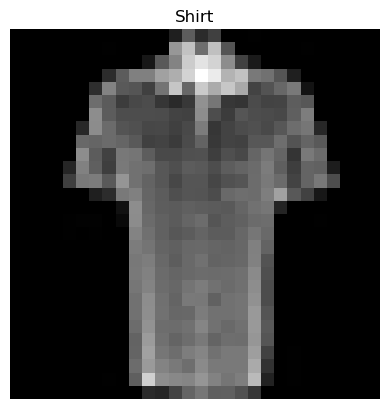

In [18]:
# Show a sample
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");

print(f"\nImage size: {img.shape}");
print(f"Label: {label}, label size: {label.shape}");

In [21]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [24]:
print(x)
print(output)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000,
          0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000,

In [28]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [32]:
# Import accuracy metric
from helper_functions import accuracy_fn 
# Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

import torchmetrics

accuracy_torch_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

accuracy_fn
accuracy_torch_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

MulticlassAccuracy()

In [35]:
from timeit import default_timer as timer 

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [36]:
# Functionize the train & test loop(s):

def train_step(model: torch.nn.Module
               , data_loader: torch.utils.data.DataLoader
               , loss_fn: torch.nn.Module
               , optimizer: torch.optim.Optimizer
               , accuracy_fn
               , device: torch.device = device):
    
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(
            y_true=y
            , y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(
    data_loader: torch.utils.data.DataLoader
    , model: torch.nn.Module
    , loss_fn: torch.nn.Module
    , accuracy_fn
    , device: torch.device = device):
    
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(
                y_true=y
                , y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [37]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module
               , data_loader: torch.utils.data.DataLoader
               , loss_fn: torch.nn.Module
               , accuracy_fn
               , device: torch.device = device):   
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(
                y_true=y
                , y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__ # only works when model was created with a class
            , "model_loss": loss.item()
            , "model_acc": acc}

In [39]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape 
                , out_channels=hidden_units
                , kernel_size=3 # how big is the square that's going over the image?
                , stride=1 # default
                , padding=1) # "valid" (no pad) or "same" (output same shape as input) or int for spec num 
            , nn.ReLU()
            , nn.Conv2d(in_channels=hidden_units 
                      , out_channels=hidden_units
                      , kernel_size=3
                      , stride=1
                      , padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(hidden_units, hidden_units, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten()
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            , nn.Linear(in_features=hidden_units*7*7 
                      , out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [89]:
device

'mps'

In [90]:
torch.manual_seed(27)
model_2 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=16
    , output_shape=len(class_names)
).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [209]:
model_2.parameters

<bound method Module.parameters of FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)>

In [91]:
# Setup loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_2.parameters()
    , lr=0.01)

In [44]:
from tqdm.auto import tqdm

In [92]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 6
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader 
        , model=model_2
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_2
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2
    , end=train_time_end_model_2
    , device=device)

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.26926 | Train accuracy: 53.94%
Test loss: 0.65979 | Test accuracy: 75.02%

Epoch: 1
---------
Train loss: 0.55685 | Train accuracy: 79.73%
Test loss: 0.50010 | Test accuracy: 81.85%

Epoch: 2
---------
Train loss: 0.45020 | Train accuracy: 83.79%
Test loss: 0.43742 | Test accuracy: 84.35%

Epoch: 3
---------
Train loss: 0.40611 | Train accuracy: 85.39%
Test loss: 0.41848 | Test accuracy: 84.83%

Epoch: 4
---------
Train loss: 0.37893 | Train accuracy: 86.42%
Test loss: 0.39526 | Test accuracy: 85.84%

Epoch: 5
---------
Train loss: 0.35926 | Train accuracy: 87.11%
Test loss: 0.36981 | Test accuracy: 86.68%

Train time on mps: 390.770 seconds


In [93]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.36981454491615295,
 'model_acc': 86.68130990415335}

In [94]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

torch.manual_seed(27)
model_3 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=32
    , output_shape=len(class_names)
).to(device)

model_3

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

In [95]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_3.parameters()
    , lr=0.01)

In [96]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_3 = timer()

# Train and test model 
epochs = 9
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader 
        , model=model_3
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_3
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_3 = timer()
total_train_time_model_3 = print_train_time(
    start=train_time_start_model_3
    , end=train_time_end_model_3
    , device=device)

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.89853 | Train accuracy: 67.58%
Test loss: 0.54379 | Test accuracy: 80.13%

Epoch: 1
---------
Train loss: 0.47798 | Train accuracy: 82.95%
Test loss: 0.44460 | Test accuracy: 84.09%

Epoch: 2
---------
Train loss: 0.40473 | Train accuracy: 85.66%
Test loss: 0.40498 | Test accuracy: 85.53%

Epoch: 3
---------
Train loss: 0.36373 | Train accuracy: 86.97%
Test loss: 0.37115 | Test accuracy: 86.76%

Epoch: 4
---------
Train loss: 0.33676 | Train accuracy: 87.89%
Test loss: 0.34459 | Test accuracy: 87.84%

Epoch: 5
---------
Train loss: 0.31873 | Train accuracy: 88.66%
Test loss: 0.34991 | Test accuracy: 87.72%

Epoch: 6
---------
Train loss: 0.30305 | Train accuracy: 89.19%
Test loss: 0.34741 | Test accuracy: 87.79%

Epoch: 7
---------
Train loss: 0.29167 | Train accuracy: 89.55%
Test loss: 0.31554 | Test accuracy: 88.77%

Epoch: 8
---------
Train loss: 0.28220 | Train accuracy: 90.00%
Test loss: 0.31135 | Test accuracy: 89.05%

Train time on mps: 602.147 s

In [85]:
# Get model_2 results 
model_3_results = eval_model(
    model=model_3
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_3_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2466222494840622,
 'model_acc': 92.06269968051119}

In [82]:
# Get model_2 results 
model_3_results = eval_model(
    model=model_3
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_3_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.23812277615070343,
 'model_acc': 92.1026357827476}

In [97]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

torch.manual_seed(27)
model_4 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=28
    , output_shape=len(class_names)
).to(device)

model_4

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1372, out_features=10, bias=True)
  )
)

In [98]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_4.parameters()
    , lr=0.01)

In [133]:
optimizer.param_groups[0]['lr']
loss_fn
# model_4.parameters('hidden_units')
model_4.block_1[0]

0.01

CrossEntropyLoss()

Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [134]:
print(f"Model 4: lr={optimizer.param_groups[0]['lr']}, model params: {model_4.block_1[0]}")

Model 4: lr=0.01, model params: Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [140]:
print(f"Model 4: lr={optimizer.param_groups[0]['lr']}, model params: {model_4.block_1[0]}")

torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_4 = timer()

# Train and test model 
epochs = 9
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader 
        , model=model_4
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_4
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_4 = timer()
total_train_time_model_4 = print_train_time(
    start=train_time_start_model_4
    , end=train_time_end_model_4
    , device=device)

Model 4: lr=0.01, model params: Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.22971 | Train accuracy: 91.59%
Test loss: 0.29399 | Test accuracy: 89.47%

Epoch: 1
---------
Train loss: 0.22478 | Train accuracy: 91.84%
Test loss: 0.27778 | Test accuracy: 89.75%

Epoch: 2
---------
Train loss: 0.22192 | Train accuracy: 91.94%
Test loss: 0.26799 | Test accuracy: 90.16%

Epoch: 3
---------
Train loss: 0.21755 | Train accuracy: 92.04%
Test loss: 0.26147 | Test accuracy: 90.50%

Epoch: 4
---------
Train loss: 0.21415 | Train accuracy: 92.32%
Test loss: 0.25344 | Test accuracy: 90.74%

Epoch: 5
---------
Train loss: 0.21021 | Train accuracy: 92.34%
Test loss: 0.28515 | Test accuracy: 89.94%

Epoch: 6
---------
Train loss: 0.20664 | Train accuracy: 92.48%
Test loss: 0.26141 | Test accuracy: 90.71%

Epoch: 7
---------
Train loss: 0.20367 | Train accuracy: 92.66%
Test loss: 0.26483 | Test accuracy: 90.62%

Epoch: 8
---------
Train loss: 0.20035 | Train accuracy: 92.69%
Test loss: 0.25473 | Test accuracy: 90.94%

Train time on mps: 543.276 s

In [139]:
print(f"Model 4: lr={optimizer.param_groups[0]['lr']}, model params: {model_4.block_1[0]}")

model_4_results = eval_model(
    model=model_4
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_4_results

Model 4: lr=0.01, model params: Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.27338624000549316,
 'model_acc': 90.45527156549521}

Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [163]:
# A trick for remembering hidden size and calculating the spatial dementions after going through the layers:

import torch.nn as nn

class FashionMNISTModelV3(nn.Module):
    def __init__(self, hidden_channels=32):
        super().__init__()
        self.hidden_channels = hidden_channels  # <- keep it!
        self.block_1 = nn.Sequential(
            nn.Conv2d(1, hidden_channels, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(hidden_channels, hidden_channels, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_channels, hidden_channels, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(hidden_channels, hidden_channels, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        # 28x28 -> pool2x -> 14x14 -> pool2x -> 7x7; flatten -> hidden_channels*7*7
        """
        Translation --> To calculate our 'in_features': In block1, since the nn.MaxPool2d kernal_size=2, we             DIVIDE 28x28 by 2 (hence 28x28 --> 14x14); then in block2, the same occurs, so 14x14 --> 7x7, which             must be multiplied by our 'hidden_channels'; so for our classifier, we flatten, then build our Linear           Layer with that equation for 'in_features' and our out_features=10, as we have 10 diff't classes;
        
        nn.Linear(in_features=(hidden_channels * 7 * 7, out_features=10)
        
        """
        self.classifier = nn.Sequential(
            nn.Flatten(1)
            , nn.Linear(
                in_features=(hidden_channels * 7 * 7)
                , out_features=10),
        )

    def __repr__(self):
        # optional: include hyperparams in repr for easy logging
        base = super().__repr__()
        return f"{base[:-1]}\n  (hidden_channels): {self.hidden_channels}\n)"
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [152]:
torch.manual_seed(27)
model_0x = FashionMNISTModelV3(
#     input_shape=1
    hidden_channels=64
#     , output_shape=len(class_names)
).to(device)

model_0x

FashionMNISTModelV3(
  (block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )

  (hidden_channels): 64
)

In [155]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn_0x = nn.CrossEntropyLoss()
optimizer_0x = torch.optim.SGD(
    params=model_0x.parameters()
    , lr=0.007)

In [156]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_0x = timer()

# Train and test model 
epochs = 9
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader 
        , model=model_0x
        , loss_fn=loss_fn_0x
        , optimizer=optimizer_0x
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_0x
        , loss_fn=loss_fn_0x
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_0x = timer()
total_train_time_model_0x = print_train_time(
    start=train_time_start_model_0x
    , end=train_time_end_model_0x
    , device=device)

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.24837 | Train accuracy: 90.94%
Test loss: 0.29816 | Test accuracy: 88.99%

Epoch: 1
---------
Train loss: 0.24239 | Train accuracy: 91.20%
Test loss: 0.28087 | Test accuracy: 89.89%

Epoch: 2
---------
Train loss: 0.23673 | Train accuracy: 91.41%
Test loss: 0.28479 | Test accuracy: 89.23%

Epoch: 3
---------
Train loss: 0.23146 | Train accuracy: 91.58%
Test loss: 0.26748 | Test accuracy: 90.34%

Epoch: 4
---------
Train loss: 0.22663 | Train accuracy: 91.86%
Test loss: 0.26710 | Test accuracy: 90.52%

Epoch: 5
---------
Train loss: 0.22175 | Train accuracy: 92.06%
Test loss: 0.27997 | Test accuracy: 89.90%

Epoch: 6
---------
Train loss: 0.21633 | Train accuracy: 92.12%
Test loss: 0.27079 | Test accuracy: 90.29%

Epoch: 7
---------
Train loss: 0.21271 | Train accuracy: 92.28%
Test loss: 0.26669 | Test accuracy: 90.41%

Epoch: 8
---------
Train loss: 0.20844 | Train accuracy: 92.44%
Test loss: 0.26565 | Test accuracy: 90.36%

Train time on mps: 590.522 s

In [157]:
print(f"Model: lr={optimizer_0x.param_groups[0]['lr']}, model params: {model_0x.block_1[0]}")

model_0x_results = eval_model(
    model=model_0x
    , data_loader=test_dataloader
    , loss_fn=loss_fn_0x
    , accuracy_fn=accuracy_fn
)
model_0x_results

Model: lr=0.007, model params: Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.2656458020210266,
 'model_acc': 90.35543130990415}

In [158]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn_0x = nn.CrossEntropyLoss()
optimizer_0x = torch.optim.SGD(
    params=model_0x.parameters()
    , lr=0.005)

In [159]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_0x = timer()

# Train and test model 
epochs = 9
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader 
        , model=model_0x
        , loss_fn=loss_fn_0x
        , optimizer=optimizer_0x
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_0x
        , loss_fn=loss_fn_0x
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_0x = timer()
total_train_time_model_0x = print_train_time(
    start=train_time_start_model_0x
    , end=train_time_end_model_0x
    , device=device)

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.19841 | Train accuracy: 92.74%
Test loss: 0.26851 | Test accuracy: 90.39%

Epoch: 1
---------
Train loss: 0.19559 | Train accuracy: 92.89%
Test loss: 0.25692 | Test accuracy: 90.62%

Epoch: 2
---------
Train loss: 0.19262 | Train accuracy: 92.97%
Test loss: 0.26444 | Test accuracy: 90.28%

Epoch: 3
---------
Train loss: 0.18966 | Train accuracy: 93.16%
Test loss: 0.24592 | Test accuracy: 91.47%

Epoch: 4
---------
Train loss: 0.18686 | Train accuracy: 93.25%
Test loss: 0.24751 | Test accuracy: 91.28%

Epoch: 5
---------
Train loss: 0.18390 | Train accuracy: 93.38%
Test loss: 0.26061 | Test accuracy: 90.86%

Epoch: 6
---------
Train loss: 0.18085 | Train accuracy: 93.39%
Test loss: 0.25148 | Test accuracy: 91.09%

Epoch: 7
---------
Train loss: 0.17846 | Train accuracy: 93.54%
Test loss: 0.25170 | Test accuracy: 91.14%

Epoch: 8
---------
Train loss: 0.17574 | Train accuracy: 93.67%
Test loss: 0.25294 | Test accuracy: 90.83%

Train time on mps: 585.527 s

In [164]:
print(f"Model: lr={optimizer_0x.param_groups[0]['lr']}, model params: {model_0x.block_1[0]}")

model_0x_results = eval_model(
    model=model_0x
    , data_loader=test_dataloader
    , loss_fn=loss_fn_0x
    , accuracy_fn=accuracy_fn
)
model_0x_results

Model: lr=0.005, model params: Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.25294041633605957,
 'model_acc': 90.83466453674122}

In [ ]:
'''
class FashionMNIST_CNN(nn.Module):
    def __init__(self):
        super(FashionMNIST_CNN, self).__init__()
        # Convolutional layers for feature extraction
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2, stride=2)
            , nn.Conv2d(32, 64, kernel_size=3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Fully connected layers for classification
        # The input size to the first fully connected layer depends on the output of conv_layers
        # For 28x28 input, after two 2x2 max pools, spatial dimensions become 7x7
        # So, 64 filters * 7 * 7 = 3136
        self.classifier = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128), # Example hidden layer with 128 units
            , nn.ReLU()
            , nn.Dropout(0.5) # Optional: Add dropout for regularization
            , nn.Linear(128, 10) # Output layer for 10 classes
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1) # Flatten the feature maps
        x = self.classifier(x)
        return x
'''

In [ ]:
"""
# lr=0.007; h/u=32:

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.23812277615070343,
 'model_acc': 92.1026357827476}

<torch._C.Generator at 0x10c154cb0>
100%
 9/9 [09:12<00:00, 61.46s/it]
Epoch: 0
---------
Train loss: 0.11843 | Train accuracy: 95.84%
Test loss: 0.23914 | Test accuracy: 92.13%

Epoch: 1
---------
Train loss: 0.11679 | Train accuracy: 95.89%
Test loss: 0.23882 | Test accuracy: 92.00%

Epoch: 2
---------
Train loss: 0.11516 | Train accuracy: 96.00%
Test loss: 0.23933 | Test accuracy: 92.22%

Epoch: 3
---------
Train loss: 0.11382 | Train accuracy: 96.06%
Test loss: 0.24243 | Test accuracy: 91.96%

Epoch: 4
---------
Train loss: 0.11238 | Train accuracy: 96.08%
Test loss: 0.23996 | Test accuracy: 92.11%

Epoch: 5
---------
Train loss: 0.11032 | Train accuracy: 96.16%
Test loss: 0.24535 | Test accuracy: 92.02%

Epoch: 6
---------
Train loss: 0.10877 | Train accuracy: 96.28%
Test loss: 0.24819 | Test accuracy: 92.09%

Epoch: 7
---------
Train loss: 0.10700 | Train accuracy: 96.20%
Test loss: 0.25138 | Test accuracy: 91.95%

Epoch: 8
---------
Train loss: 0.10537 | Train accuracy: 96.36%
Test loss: 0.24662 | Test accuracy: 92.06%

Train time on mps: 552.609 seconds

"""

In [ ]:
"""

<bound method NeuralNet.get_params of <class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=SimpleCNN(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fc1): Linear(in_features=3136, out_features=128, bias=True)
    (fc2): Linear(in_features=128, out_features=10, bias=True)
    (dropout): Dropout(p=0.0, inplace=False)
  ),
  
"""

In [166]:
# Create a convolutional neural network 
class FashionMNISTModelV4(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape 
                , out_channels=32
                , kernel_size=3 # how big is the square that's going over the image?
                , stride=1 # default
                , padding=1) # "valid" (no pad) or "same" (output same shape as input) or int for spec num 
            , nn.ReLU()
            , nn.Conv2d(in_channels=32 
                      , out_channels=64
                      , kernel_size=3
                      , stride=1
                      , padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(64, 64, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(64, 32, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten()
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            , nn.Linear(in_features=32*7*7 
                      , out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [168]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

torch.manual_seed(27)
model_4 = FashionMNISTModelV4(
    input_shape=1
    , hidden_units=64
    , output_shape=len(class_names)
).to(device)

model_4

FashionMNISTModelV4(
  (block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

In [169]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params=model_4.parameters()
    , lr=0.0003)

In [172]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_4 = timer()

# Train and test model 
epochs = 20
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader 
        , model=model_4
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_4
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_4= timer()
total_train_time_model_4= print_train_time(
    start=train_time_start_model_4
    , end=train_time_end_model_4
    , device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.27335 | Train accuracy: 90.16%
Test loss: 0.27677 | Test accuracy: 89.93%

Epoch: 1
---------
Train loss: 0.24511 | Train accuracy: 91.07%
Test loss: 0.25821 | Test accuracy: 90.68%

Epoch: 2
---------
Train loss: 0.22383 | Train accuracy: 91.96%
Test loss: 0.24791 | Test accuracy: 91.15%

Epoch: 3
---------
Train loss: 0.20547 | Train accuracy: 92.57%
Test loss: 0.24407 | Test accuracy: 91.24%

Epoch: 4
---------
Train loss: 0.19094 | Train accuracy: 93.09%
Test loss: 0.23223 | Test accuracy: 91.71%

Epoch: 5
---------
Train loss: 0.17866 | Train accuracy: 93.65%
Test loss: 0.25460 | Test accuracy: 91.07%

Epoch: 6
---------
Train loss: 0.16710 | Train accuracy: 93.98%
Test loss: 0.23083 | Test accuracy: 91.92%

Epoch: 7
---------
Train loss: 0.15621 | Train accuracy: 94.39%
Test loss: 0.22649 | Test accuracy: 92.00%

Epoch: 8
---------
Train loss: 0.14653 | Train accuracy: 94.76%
Test loss: 0.22854 | Test accuracy: 92.23%

Epoch: 9
---------
Train los

In [173]:
# Get model_2 results 
model_4_results = eval_model(
    model=model_4
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_4_results

{'model_name': 'FashionMNISTModelV4',
 'model_loss': 0.2995302677154541,
 'model_acc': 91.83306709265176}

In [174]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [175]:
import random
random.seed(27)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 7 (Sneaker)


In [178]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_4.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_4(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

FashionMNISTModelV4(
  (block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [179]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [180]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


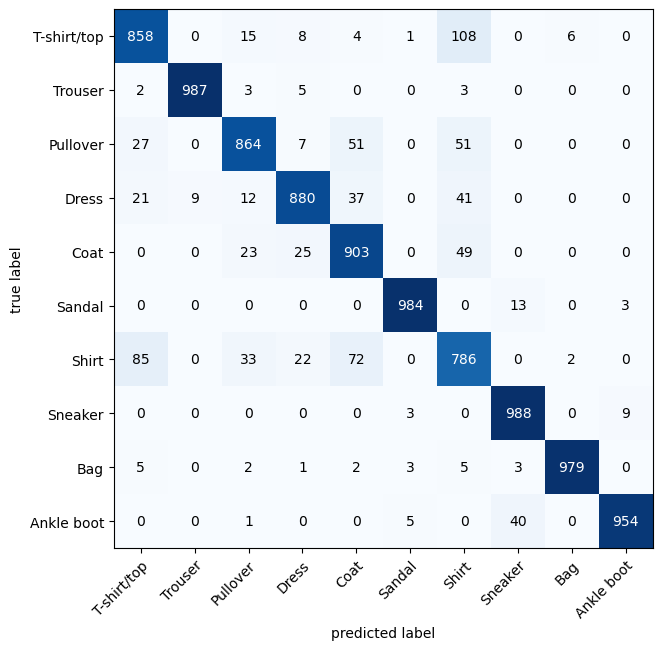

In [183]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(
    preds=y_pred_tensor,target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

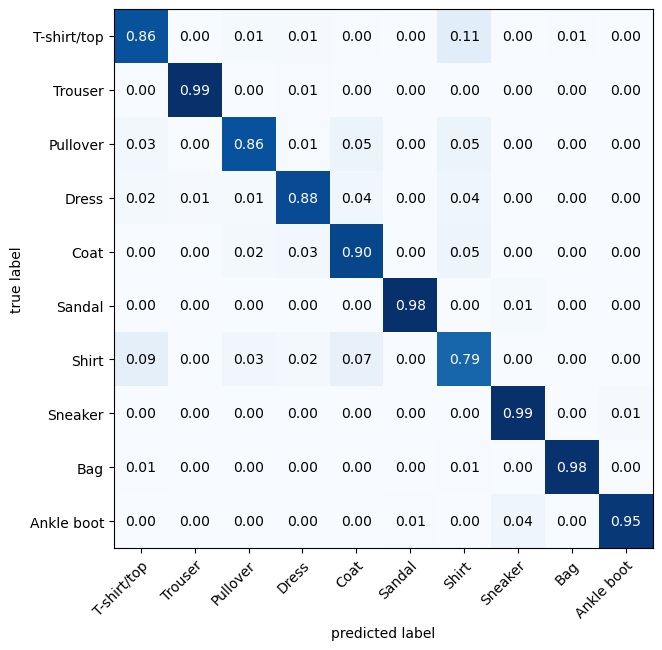

In [196]:
import numpy as np
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# Convert to numpy
cm = confmat_tensor.numpy().astype(float)

# Normalize per row (true labels) to get ratios
row_sums = cm.sum(axis=1, keepdims=True)
# Avoid division by zero for any empty classes
row_sums[row_sums == 0] = 1.0
cm_normalized = cm / row_sums

# 3. Plot the normalized confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=cm_normalized,
    class_names=class_names, show_absolute=False, show_normed=True,
    figsize=(10, 7)
);

In [184]:
import numpy as np

# Assuming confmat_tensor is your confusion matrix
cm = cm_tensor.numpy()

# Calculate the sum of each row (total predictions for each class)
row_sums = cm.sum(axis=1, keepdims=True)

# Calculate the ratios
ratio_matrix = cm / row_sums

# Replace NaN values with 0 (if any class had no predictions)
ratio_matrix = np.nan_to_num(ratio_matrix)

print(ratio_matrix);

[[0.858 0.    0.015 0.008 0.004 0.001 0.108 0.    0.006 0.   ]
 [0.002 0.987 0.003 0.005 0.    0.    0.003 0.    0.    0.   ]
 [0.027 0.    0.864 0.007 0.051 0.    0.051 0.    0.    0.   ]
 [0.021 0.009 0.012 0.88  0.037 0.    0.041 0.    0.    0.   ]
 [0.    0.    0.023 0.025 0.903 0.    0.049 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.984 0.    0.013 0.    0.003]
 [0.085 0.    0.033 0.022 0.072 0.    0.786 0.    0.002 0.   ]
 [0.    0.    0.    0.    0.    0.003 0.    0.988 0.    0.009]
 [0.005 0.    0.002 0.001 0.002 0.003 0.005 0.003 0.979 0.   ]
 [0.    0.    0.001 0.    0.    0.005 0.    0.04  0.    0.954]]


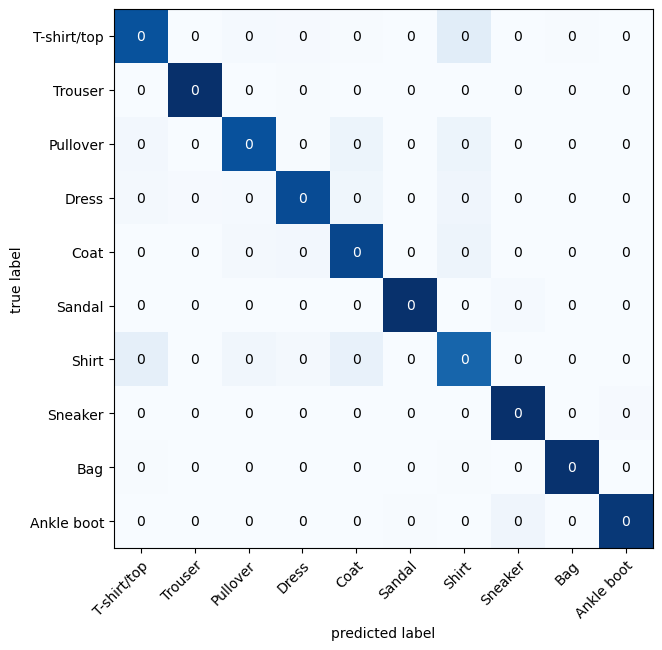

In [186]:
import numpy as np
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
cm = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# Convert the confusion matrix to NumPy array
cm = confmat_tensor.numpy()

# Calculate the sum of each row (total predictions for each class)
row_sums = cm.sum(axis=1, keepdims=True)

# Calculate the ratios
ratio_matrix = cm / row_sums

# Replace NaN values with 0 (if any class had no predictions)
ratio_matrix = np.nan_to_num(ratio_matrix)

# 3. Plot the confusion matrix with ratios
fig, ax = plot_confusion_matrix(
    conf_mat=ratio_matrix,  # Use the ratio matrix here
    class_names=class_names, # Turn the row and column labels into class names
    figsize=(10, 7)
);

In [ ]:
"""

<bound method NeuralNet.get_params of <class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=SimpleCNN(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fc1): Linear(in_features=3136, out_features=128, bias=True)
    (fc2): Linear(in_features=128, out_features=10, bias=True)
    (dropout): Dropout(p=0.0, inplace=False)
  ),
  
"""

In [200]:
# Create a convolutional neural network 
class FashionMNISTModelV5(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape 
                , out_channels=32
                , kernel_size=3 # how big is the square that's going over the image?
                , stride=1 # default
                , padding=1) # "valid" (no pad) or "same" (output same shape as input) or int for spec num 
            , nn.ReLU()
            , nn.Conv2d(in_channels=32 
                      , out_channels=64
                      , kernel_size=3
                      , stride=1
                      , padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2
                           , stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(64, 64, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(64, 64, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten()
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            , nn.Linear(in_features=64*7*7 
                      , out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [201]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

torch.manual_seed(27)
model_5 = FashionMNISTModelV5(
    input_shape=1
    , hidden_units=64
    , output_shape=len(class_names)
).to(device)

model_5

FashionMNISTModelV5(
  (block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )
)

In [202]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params=model_5.parameters()
    , lr=0.0003)

In [203]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_5 = timer()

# Train and test model 
epochs = 20
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader 
        , model=model_5
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_5
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_5= timer()
total_train_time_model_5=print_train_time(
    start=train_time_start_model_5
    , end=train_time_end_model_5
    , device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.48347 | Train accuracy: 82.45%
Test loss: 0.34810 | Test accuracy: 87.46%

Epoch: 1
---------
Train loss: 0.30377 | Train accuracy: 89.12%
Test loss: 0.30053 | Test accuracy: 89.23%

Epoch: 2
---------
Train loss: 0.26004 | Train accuracy: 90.69%
Test loss: 0.27711 | Test accuracy: 89.89%

Epoch: 3
---------
Train loss: 0.23049 | Train accuracy: 91.61%
Test loss: 0.25629 | Test accuracy: 90.51%

Epoch: 4
---------
Train loss: 0.20874 | Train accuracy: 92.50%
Test loss: 0.24203 | Test accuracy: 91.17%

Epoch: 5
---------
Train loss: 0.18929 | Train accuracy: 93.17%
Test loss: 0.23590 | Test accuracy: 91.57%

Epoch: 6
---------
Train loss: 0.17255 | Train accuracy: 93.76%
Test loss: 0.22754 | Test accuracy: 92.22%

Epoch: 7
---------
Train loss: 0.15772 | Train accuracy: 94.23%
Test loss: 0.22787 | Test accuracy: 92.01%

Epoch: 8
---------
Train loss: 0.14584 | Train accuracy: 94.75%
Test loss: 0.21625 | Test accuracy: 92.64%

Epoch: 9
---------
Train los

In [204]:
# Get model_5 results 
model_5_results = eval_model(
    model=model_5
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_5_results

{'model_name': 'FashionMNISTModelV5',
 'model_loss': 0.33294937014579773,
 'model_acc': 92.12260383386581}

In [207]:
import pandas as pd
compare_results = pd.DataFrame([model_0x_results, model_2_results, model_3_results, model_4_results, model_5_results])
compare_results.sort_values(by='model_acc', ascending=False)

,model_name,model_loss,model_acc
4,FashionMNISTModelV5,0.332949,92.122604
2,FashionMNISTModelV2,0.246622,92.062700
3,FashionMNISTModelV4,0.299530,91.833067
0,FashionMNISTModelV3,0.252940,90.834665
1,FashionMNISTModelV2,0.369815,86.681310


In [ ]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

torch.manual_seed(27)
model_5 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=64
    , output_shape=len(class_names)
).to(device)

model_5